<a href="https://colab.research.google.com/github/custom-hyper/Research/blob/main/Multi_bagger_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# To do
* Practice annotations
*  what is the  largest average return by country, sector, initial market CAP
*  change script so that any csv in the folder gets picked up





In [ ]:
#@title
!pip install requests
!pip install jsonNEC is be gets picked up
!pip install datetime
!pip install pylab
!pip install seaborn

ERROR: Could not find a version that satisfies the requirement jsonNEC (from versions: none)
ERROR: No matching distribution found for jsonNEC
     |████████████████████████████████| 51 kB 112 kB/s 
     |████████████████████████████████| 251 kB 13.8 MB/s 
ERROR: Could not find a version that satisfies the requirement pylab (from versions: none)
ERROR: No matching distribution found for pylab


#Environment Setup

In [ ]:
#@title Import file { display-mode: "code" }
import requests

from datetime import datetime
import time
import json
from google.colab import data_table
import numpy as np
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


#Coin Metrics
path = '/content/drive/MyDrive/workspace/pipelines/datasets/Tradingview/Multi-bagger/'
csv = 'Tradingview.csv'

df = pd.read_csv(path + csv)


In [ ]:
#@title Dataset descriptions { display-mode: "code" }
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ticker                         381 non-null    object 
 1   Description                    381 non-null    object 
 2   Change %                       381 non-null    float64
 3   Volume                         381 non-null    int64  
 4   Volume*Price                   381 non-null    float64
 5    Market Capitalization         280 non-null    object 
 6   Price to Earnings Ratio (TTM)  146 non-null    float64
 7   Basic EPS (TTM)                248 non-null    float64
 8   Sector                         359 non-null    object 
 9   Country                        359 non-null    object 
 10  Exchange                       381 non-null    object 
 11  Yearly Performance             381 non-null    float64
 12  Current Ratio (MRQ)            244 non-null    flo

In [ ]:
#@title Looks for duplicates { display-mode: "code" }
# Total number of rows and columns
df.shape

# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print('Number of duplicate rows: ', duplicate_rows_df.shape)


Number of duplicate rows:  (0, 19)


In [ ]:
print(df.isnull().sum())


Ticker                             0
Description                        0
Change %                           0
Volume                             0
Volume*Price                       0
 Market Capitalization           101
Price to Earnings Ratio (TTM)    235
Basic EPS (TTM)                  133
Sector                            22
Country                           22
Exchange                           0
Yearly Performance                 0
Current Ratio (MRQ)              137
Dividends Yield (FY)             315
Net Income (FY)                  103
Volatility                         0
Initial Market Capitalization    101
Unnamed: 17                      381
Unnamed: 18                      380
dtype: int64


In [ ]:
df['Ticker'].drop_duplicates()
df['Description'].drop_duplicates()
df['Initial Market Capitalization']
df.describe()

,Change %,Volume,Volume*Price,Price to Earnings Ratio (TTM),Basic EPS (TTM),Yearly Performance,Current Ratio (MRQ),Dividends Yield (FY),Net Income (FY),Volatility,Initial Market Capitalization,Unnamed: 17
count,381.000000,3.810000e+02,3.810000e+02,146.000000,248.000000,381.000000,244.000000,66.000000,2.780000e+02,381.000000,2.800000e+02,0.0
mean,1.394333,1.510161e+07,2.717825e+09,639.211880,1.358731,8629.122467,7.670488,1.553232,3.264180e+07,7.185283,1.241598e+08,NaN
std,5.205958,1.566284e+08,2.212647e+10,4969.357004,12.485045,64309.942168,27.409995,2.305168,1.800037e+08,5.867026,5.481969e+08,NaN
min,-11.918063,0.000000e+00,0.000000e+00,0.018899,-0.787751,500.000000,0.000000,0.000000,-3.004330e+08,0.000000,1.801200e+04,NaN
25%,-1.960784,2.445000e+03,4.663808e+04,13.664705,-0.007563,577.272727,0.698488,0.028078,-1.407394e+06,4.455963,1.638778e+06,NaN
50%,0.849058,2.832000e+04,1.053464e+06,35.117683,0.002759,775.179340,1.340915,0.270226,1.895830e+04,5.572414,8.243960e+06,NaN
75%,4.926108,3.140510e+05,1.052842e+07,98.782030,0.091939,1326.315789,3.220225,2.867537,2.438004e+06,9.253870,4.354912e+07,NaN
max,31.034483,2.144392e+09,3.230000e+11,59500.000000,194.324452,847955.555600,240.280000,8.726004,1.712527e+09,65.833333,6.780471e+09,NaN


In [ ]:
df_country = df.groupby('Country').count()


In [ ]:
df.groupby('Country').median()

,Change %,Volume,Volume*Price,Price to Earnings Ratio (TTM),Basic EPS (TTM),Yearly Performance,Current Ratio (MRQ),Dividends Yield (FY),Net Income (FY),Volatility,Initial Market Capitalization,Unnamed: 17
Country,,,,,,,,,,,,
Australia,0.090452,114040.0,3.436200e+04,45.312500,-0.008053,825.406283,2.281605,0.679964,-1.007414e+06,7.594937,1.628687e+07,NaN
Bahrain,0.000000,42199.0,2.363144e+04,15.686275,0.079714,12881.045380,0.605722,3.571429,1.406141e+08,0.442478,1.770406e+07,NaN
Canada,2.272727,42912.0,7.394920e+04,2.423045,-0.087836,705.000000,5.025359,NaN,-1.993708e+06,5.882353,1.446883e+07,NaN
China,2.372329,7277500.0,1.480408e+07,30.464217,0.001133,1103.519374,2.152812,3.093489,6.075583e+06,9.867244,1.443100e+07,NaN
Denmark,7.091998,64.5,1.143585e+04,18.819180,7.064080,377064.044944,1.289544,1.541733,9.355856e+08,6.616991,1.851729e+09,NaN
Egypt,0.000000,671074.0,1.771635e+05,0.412242,0.040480,6001.224867,NaN,NaN,6.016126e+07,2.681992,2.933070e+05,NaN
France,2.766129,2.5,6.600000e+01,43.106853,7.051374,1772.872763,2.207172,3.877184,6.229165e+07,2.677644,5.494357e+08,NaN
Germany,2.614169,0.0,0.000000e+00,NaN,5.549540,960.237525,3.221643,7.246377,-5.777307e+05,2.541218,1.884890e+06,NaN
Hong Kong,5.150924,152662.5,2.122724e+06,305.907173,-0.002558,581.868687,0.939796,0.000000,-1.716440e+06,9.564347,1.640707e+07,NaN


# 5X + Multi-bagger Analysis, Past 12 Months

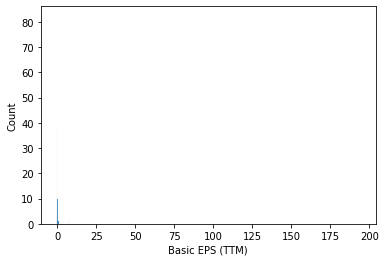

In [ ]:
#@title Yearly { display-mode: "code" }

#Dilution.skew()
sns.histplot(data=df,  x="Basic EPS (TTM)")

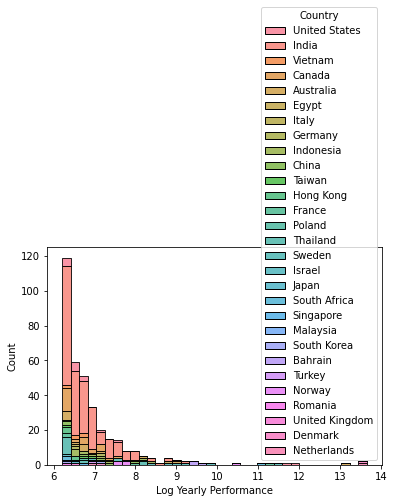

In [ ]:
df['Log Yearly Performance'] = np.log(df['Yearly Performance'])
#Dilution.skew()
sns.histplot(data=df,  x="Log Yearly Performance",hue='Country', multiple="stack")

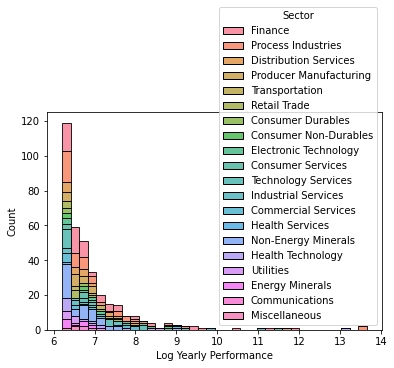

In [ ]:
df['Log Yearly Performance'] = np.log(df['Yearly Performance'])
#Dilution.skew()
sns.histplot(data=df,  x="Log Yearly Performance",hue='Sector', multiple="stack")


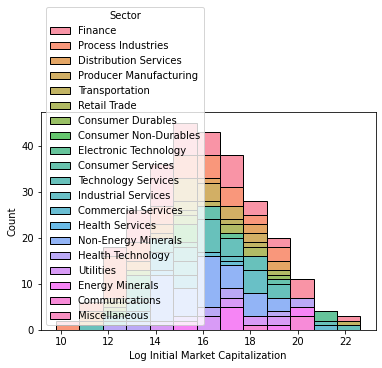

In [ ]:
#@title Initial Market Capitalization' { display-mode: "code" }
df['Log Initial Market Capitalization'] = np.log(df['Initial Market Capitalization'])
#Dilution.skew()
sns.histplot(data=df,  x="Log Initial Market Capitalization",hue='Sector', multiple="stack")



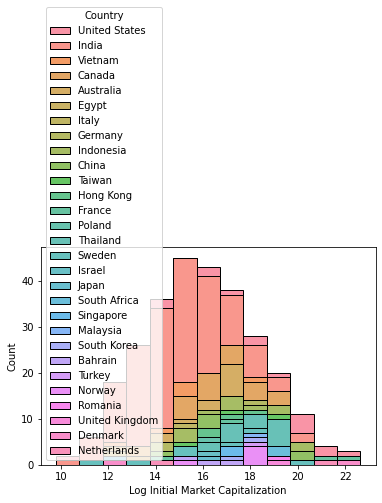

In [ ]:
df['Log Initial Market Capitalization'] = np.log(df['Initial Market Capitalization'])
#Dilution.skew()
sns.histplot(data=df,  x="Log Initial Market Capitalization",hue='Country', multiple="stack")



8243959.5

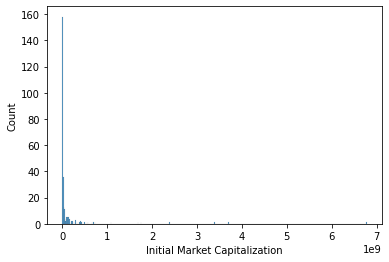

In [ ]:
df_Initial = df['Initial Market Capitalization']
#Dilution.skew()
sns.histplot(data=df_Initial)
df_Initial.median()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

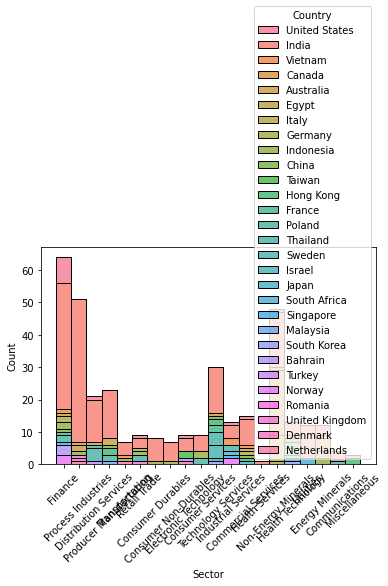

In [ ]:
#@title Sector' { display-mode: "code" }
sns.histplot(data=df,  x="Sector",hue='Country', multiple="stack")
plt.xticks(rotation=45)


Graph

Text(0.5, 1.0, 'Score Distribution')

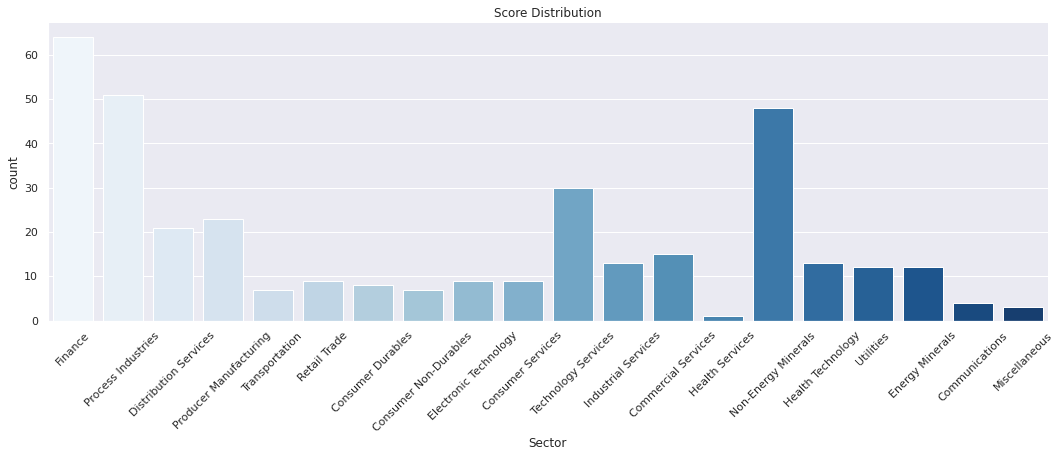

In [ ]:
#@title
sns.set(rc = {'figure.figsize':(20,8)})

p = sns.catplot(x="Sector", kind="count", palette="Blues", data=df, height=5, aspect= 3)
#plt.figure(figsize = (15,8))
plt.xticks(rotation=45)

plt.title('Score Distribution')


Text(0.5, 1.0, 'Score Distribution')

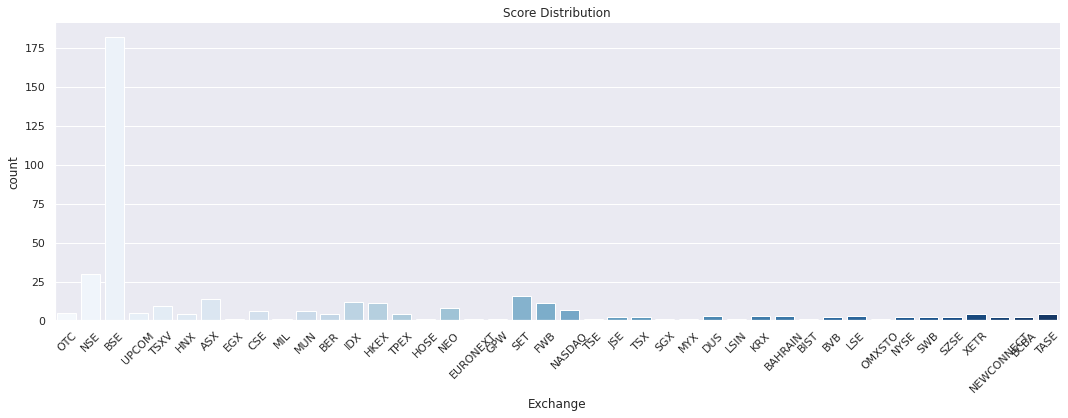

In [ ]:
#@title Exchange' { display-mode: "code" }
sns.set(rc = {'figure.figsize':(20,8)})

p = sns.catplot(x="Exchange", kind="count", palette="Blues", data=df, height=5, aspect= 3)
#plt.figure(figsize = (15,8))
plt.xticks(rotation=45)

plt.title('Score Distribution')

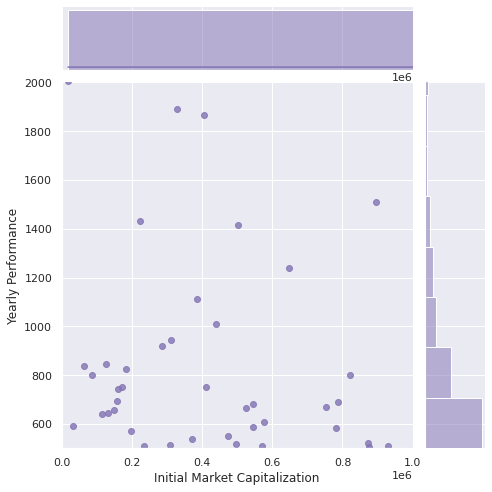

In [ ]:
#@title Regression Initial Market Capitalization' { display-mode: "code" }
import seaborn as sns
sns.set_theme(style="darkgrid")

Performance = df['Yearly Performance']
capitalization = df['Initial Market Capitalization']

g = sns.jointplot(x=capitalization, y=Performance, data=df,
                  kind="reg", truncate=False, color="m", height=7,xlim=(0, 1000000),ylim=(500, 2000))

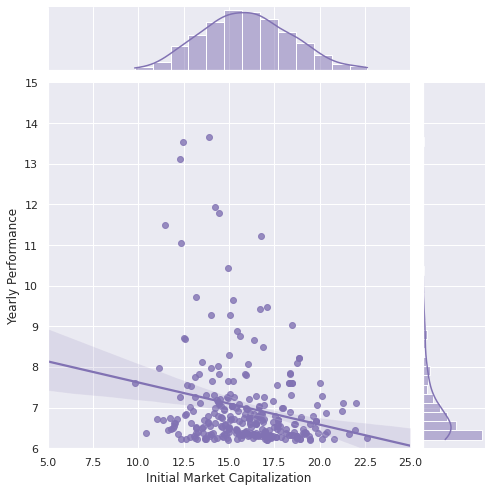

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")

log_Performance = np.log(df['Yearly Performance'])
log_capitalization = np.log(df['Initial Market Capitalization'])

g = sns.jointplot(x=log_capitalization, y=log_Performance, data=df,
                  kind="reg", truncate=False,
                  xlim=(5, 25), ylim=( 6,15), 
                  color="m", height=7)

Text(0.5, 1.0, '5X Multi-bagger count per Country')

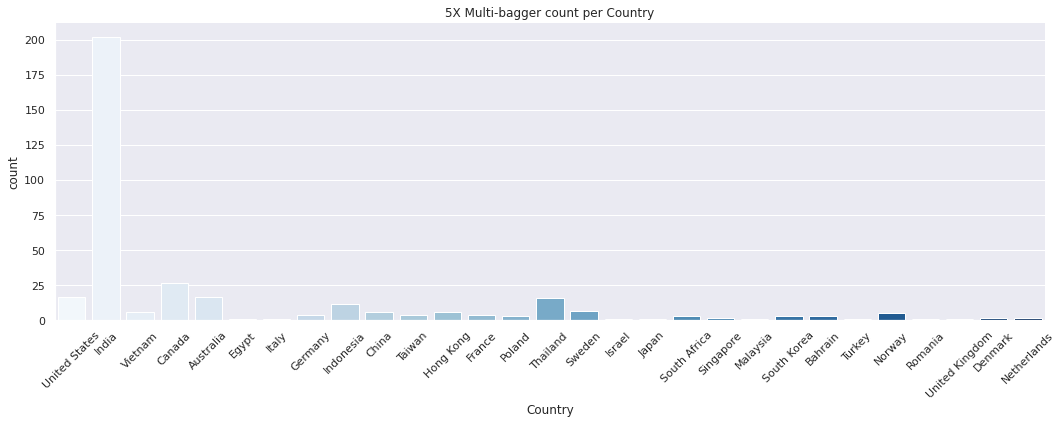

In [ ]:
#@title Country { display-mode: "code" }


p = sns.catplot(x="Country", kind="count", palette="Blues", data=df, height=5, aspect= 3)
#plt.figure(figsize = (15,8))
plt.xticks(rotation=45)

plt.title('5X Multi-bagger count per Country')


#India Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

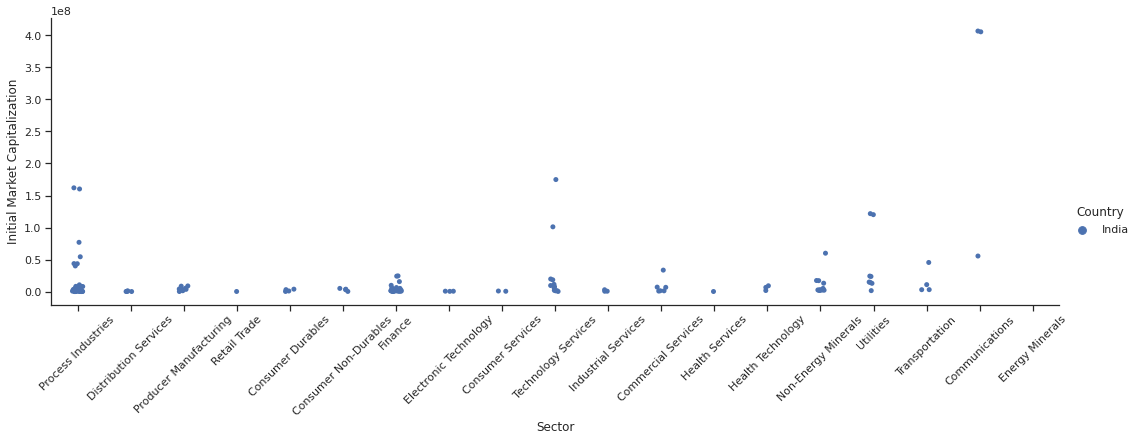

In [ ]:
#@title Initial Capitalization by Sector { display-mode: "code" }
import seaborn as sns
sns.set_theme(style="ticks")
df_India =  df[(df['Country'] == 'India')]
 #f_ETH = df_coin_metrics[(df_coin_metrics['ticker'] =='ETH')]

g = sns.catplot(x="Sector", y="Initial Market Capitalization", hue="Country", data=df_India, height=5, aspect= 3)
plt.xticks(rotation=45)


In [ ]:
df_India =  df[(df['Country'] == 'India')]
df_India.describe()

,Change %,Volume,Volume*Price,Price to Earnings Ratio (TTM),Basic EPS (TTM),Yearly Performance,Current Ratio (MRQ),Dividends Yield (FY),Net Income (FY),Volatility,Initial Market Capitalization,Unnamed: 17,Log Yearly Performance,Log Initial Market Capitalization
count,202.000000,2.020000e+02,2.020000e+02,88.000000,122.000000,202.000000,112.000000,26.000000,1.370000e+02,202.000000,1.380000e+02,0.0,202.000000,138.000000
mean,0.380675,7.709178e+05,1.796693e+07,978.227682,1.785981,1124.049618,9.267073,0.106755,-2.304686e+06,6.579756,1.913455e+07,NaN,6.779845,14.869948
std,4.104637,3.601721e+06,1.045128e+08,6388.461715,17.608003,1244.833524,36.939633,0.151998,4.715139e+07,2.487577,5.614763e+07,NaN,0.587063,1.954242
min,-7.989348,0.000000e+00,0.000000e+00,0.018899,-0.787751,500.000000,0.013408,0.000000,-2.730938e+08,0.000000,1.801200e+04,NaN,6.214608,9.798793
25%,-4.385632,3.723500e+03,1.981677e+05,15.921360,-0.000450,572.942749,0.451335,0.000000,-2.192765e+05,4.837952,7.605852e+05,NaN,6.350784,13.541722
50%,0.536169,1.884450e+04,1.457253e+06,40.537831,0.004330,742.068654,1.133389,0.047711,4.315499e+04,5.405378,2.612146e+06,NaN,6.609442,14.775493
75%,4.885330,9.532850e+04,5.652344e+06,132.544091,0.076278,1086.268932,2.237339,0.087529,8.061143e+05,8.721823,9.361023e+06,NaN,6.990504,16.051876
max,8.000000,4.050863e+07,1.292502e+09,59500.000000,194.324452,10597.979800,240.280000,0.538329,3.429276e+08,13.682501,4.067891e+08,NaN,9.268419,19.823805


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

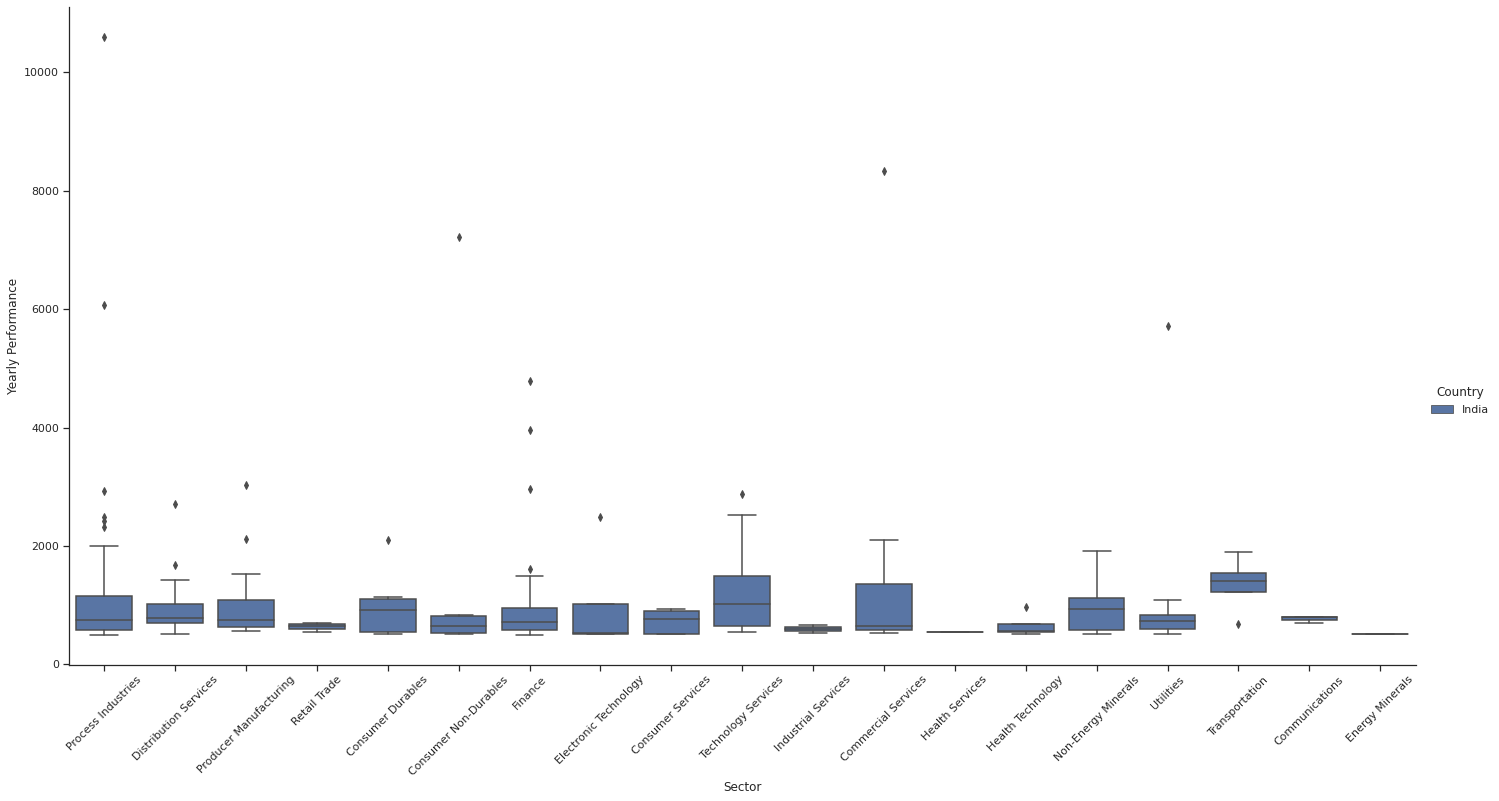

In [ ]:
 #@title Yearly Performance by Sector { display-mode: "code" }
import seaborn as sns
sns.set_theme(style="ticks")
df_India =  df[(df['Country'] == 'India')]
 #f_ETH = df_coin_metrics[(df_coin_metrics['ticker'] =='ETH')]
 

g = sns.catplot(x="Sector", y="Yearly Performance", hue="Country", kind="box",data=df_India, height=10, aspect= 2)
plt.xticks(rotation=45)

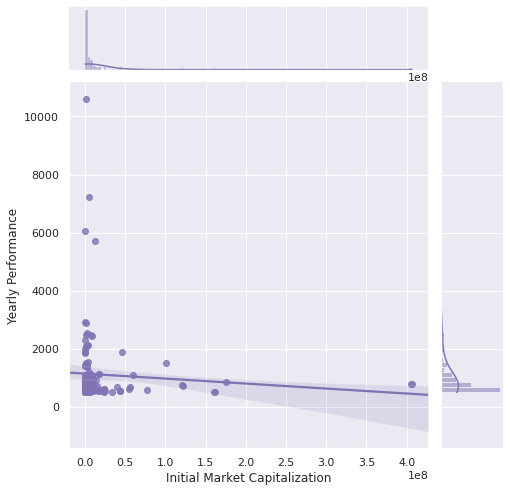

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")

Performance = df_India['Yearly Performance']
capitalization = df_India['Initial Market Capitalization']

g = sns.jointplot(x=capitalization, y=Performance, data=df,
                  kind="reg", truncate=False, color="m", height=7)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

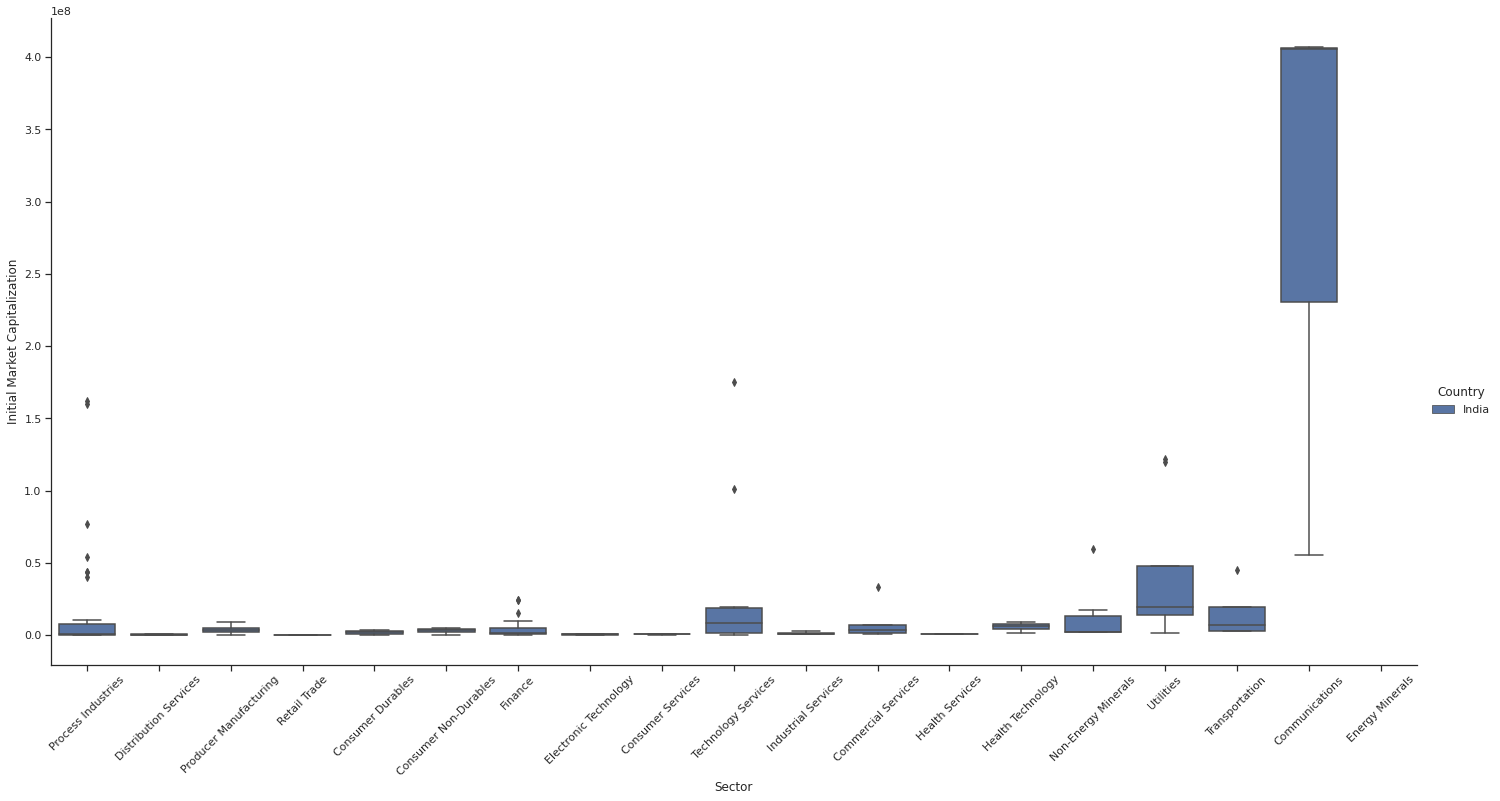

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
df_India =  df[(df['Country'] == 'India')]
 #f_ETH = df_coin_metrics[(df_coin_metrics['ticker'] =='ETH')]
 

g = sns.catplot(x="Sector", y="Initial Market Capitalization", hue="Country", kind="box",data=df_India, height=10, aspect= 2)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

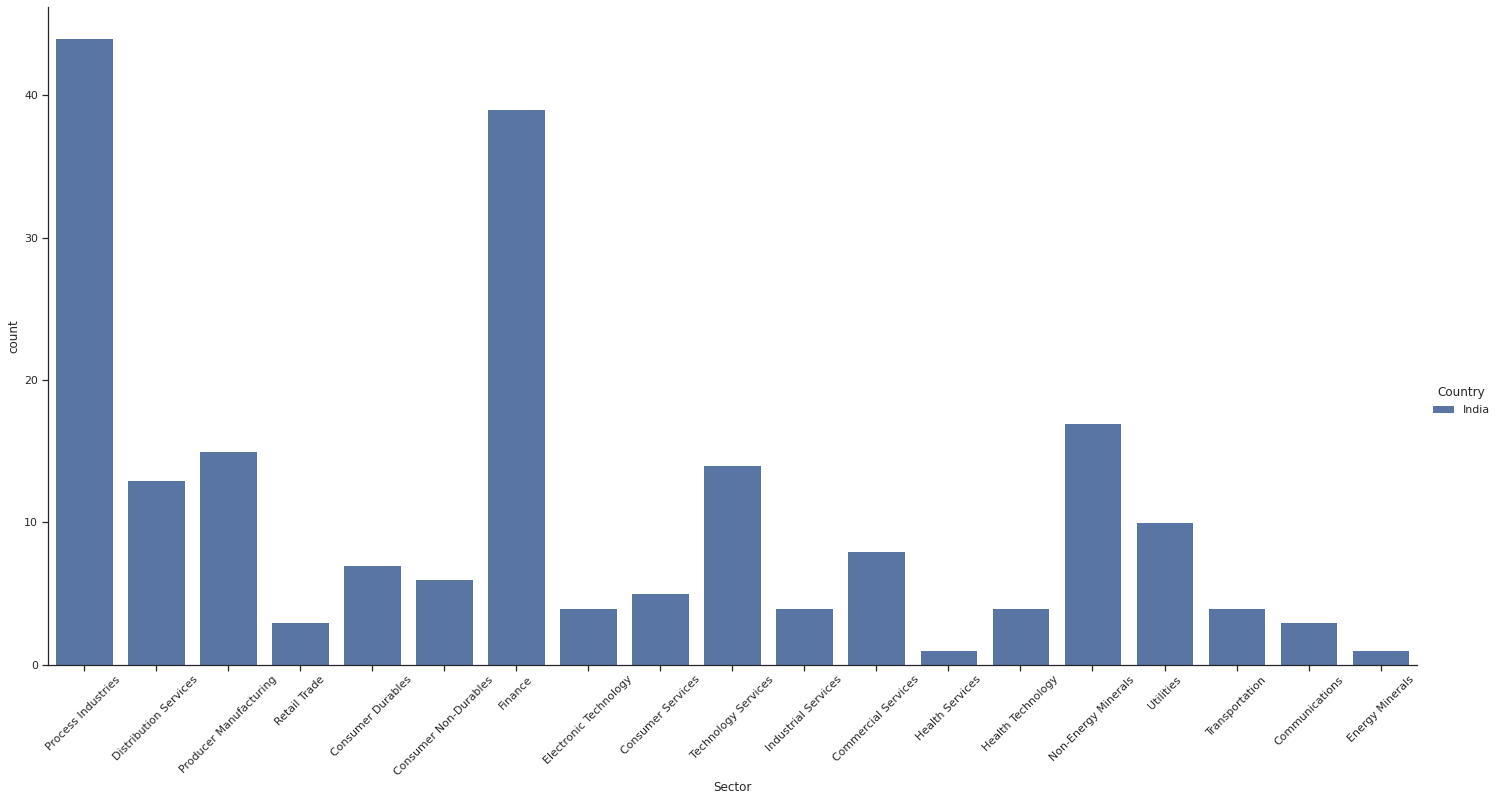

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
df_India =  df[(df['Country'] == 'India')]
 #f_ETH = df_coin_metrics[(df_coin_metrics['ticker'] =='ETH')]


g = sns.catplot(x="Sector", hue="Country", kind="count",data=df_India, height=10, aspect= 2)
plt.xticks(rotation=45)

(array([0]), <a list of 1 Text major ticklabel objects>)

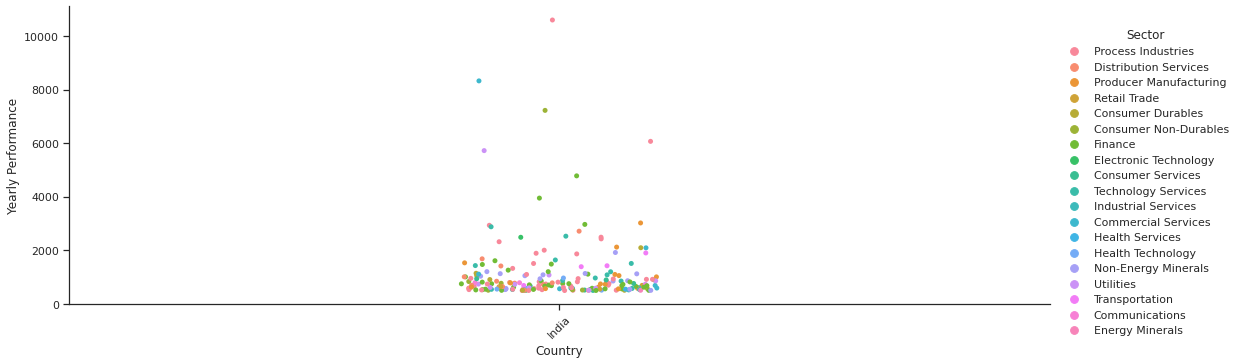

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

g = sns.catplot(x="Country", y="Yearly Performance", hue="Sector", data=df_India,  height=5, aspect= 3)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

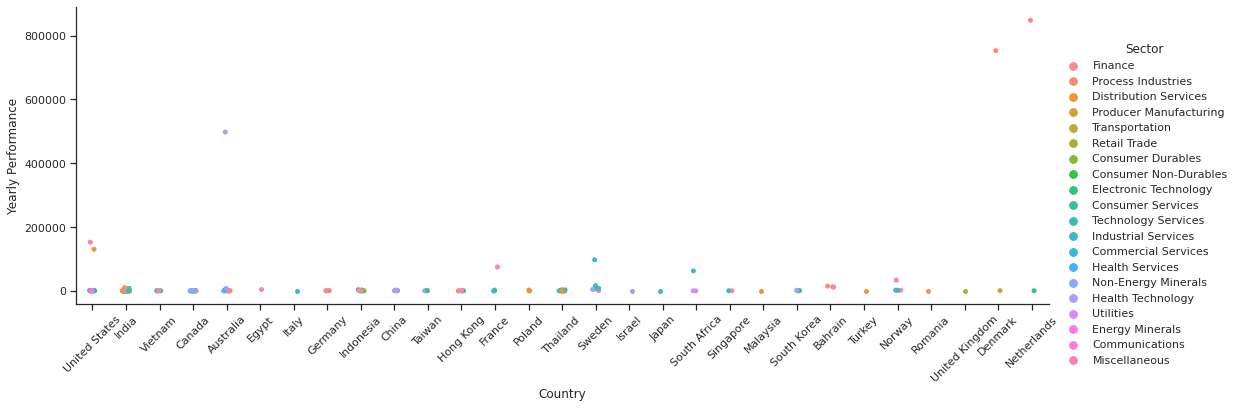

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

g = sns.catplot(x="Country", y="Yearly Performance", hue="Sector", data=df, height=5, aspect= 3)

plt.xticks(rotation=45)

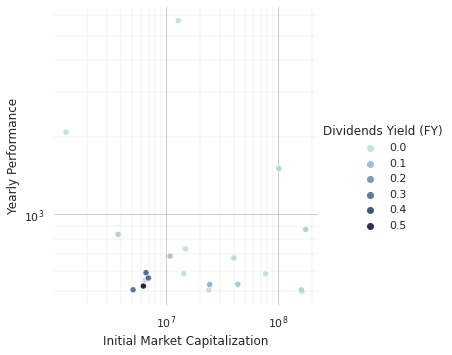

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example planets dataset
planets = sns.load_dataset("planets")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df_India,
    x="Initial Market Capitalization", y="Yearly Performance",
    hue="Dividends Yield (FY)",
    palette=cmap, sizes=(50, 5500)
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)